In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df=sns.load_dataset("titanic")

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df=df.drop(["deck"],axis=1)

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [7]:
df=df.dropna()

In [8]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


<Axes: xlabel='sex', ylabel='survived'>

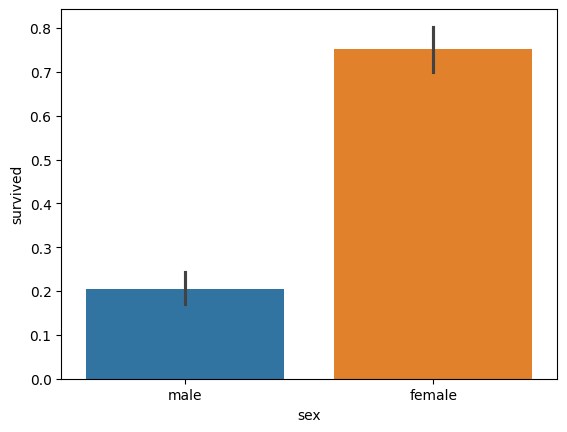

In [11]:
sns.barplot(x="sex",y="survived",data=df,hue="sex")

<Axes: xlabel='survived,sibsp'>

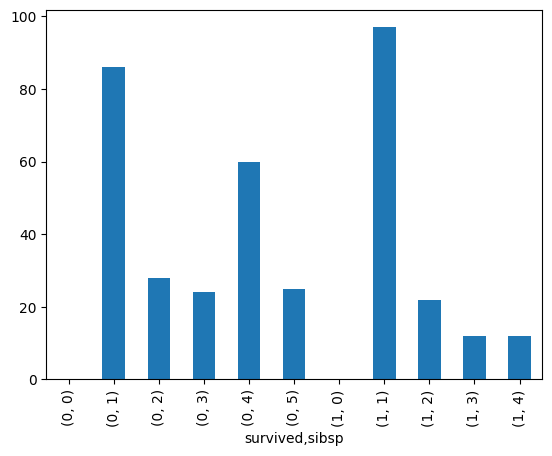

In [14]:
df.groupby(["survived","sibsp"])["sibsp"].sum().plot(kind="bar")

In [15]:
x=df.drop(["survived"],axis=1)
y=df[["survived"]]

In [17]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
mms=MinMaxScaler()
le=LabelEncoder()

In [23]:
from pandas.api.types import is_numeric_dtype
for col in x.columns:
    if is_numeric_dtype(x[col]):
      x[col]=mms.fit_transform(x[[col]])
    else:
      x[col]=le.fit_transform(x[col])

In [24]:
x.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,1.0,1,0.271174,0.2,0.0,0.014151,2,2,1,1.0,2,0,0.0
1,0.0,0,0.472229,0.2,0.0,0.139136,0,0,2,0.0,0,1,0.0
2,1.0,0,0.321438,0.0,0.0,0.015469,2,2,2,0.0,2,1,1.0
3,0.0,0,0.434531,0.2,0.0,0.103644,2,0,2,0.0,2,1,0.0
4,1.0,1,0.434531,0.0,0.0,0.015713,2,2,1,1.0,2,0,1.0


In [20]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [25]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [27]:
model=dtc.fit(xtrain,ytrain)


In [28]:
model.score(xtrain,ytrain)

1.0

In [29]:
model.score(xtest,ytest)

1.0

In [63]:
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc
accuracy_score(ytest,pred)

1.0

In [33]:
class_report=classification_report(ytest,pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        58

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143



In [40]:
confusion_matrix=confusion_matrix(ytest,pred)
confusion_matrix

array([[85,  0],
       [ 0, 58]])

<Axes: >

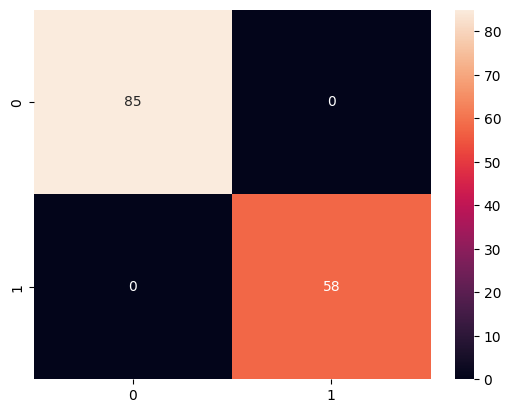

In [41]:
sns.heatmap(confusion_matrix,annot=True)

In [59]:
roc_curve=roc_curve(ytest,pred)
roc_curve

(array([0., 0., 1.]), array([0., 1., 1.]), array([inf,  1.,  0.]))

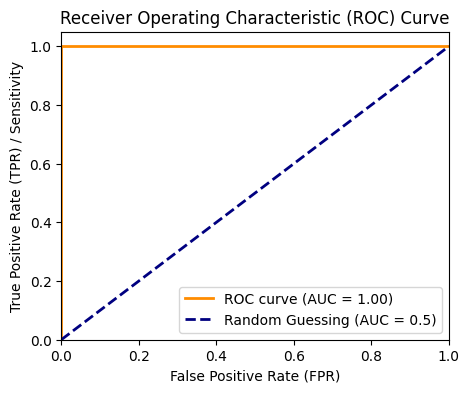

In [70]:

fpr, tpr, thresholds = roc_curve(ytest, pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) / Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [72]:
y.value_counts()

,count
survived,
0,424
1,288


In [73]:
#smote
!pip install imblearn

In [88]:
import imblearn
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [82]:
new_x_train,new_y_train=smote.fit_resample(xtrain,ytrain)


In [85]:
new_y_train.value_counts()

,count
survived,
0,339
1,339


In [93]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive
!apt-get -qq install -y graphviz && pip install pydot
import pydot
!pip install cartopy
import cartopy

E: Package 'libfluidsynth1' has no installation candidate
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 94.2 MB/s eta 0:00:00


In [94]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
xtrain_os, ytrain_os = ros.fit_resample(xtrain, ytrain)


In [95]:
ytrain_os.value_counts()


,count
survived,
0,339
1,339


In [97]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
xtrain_us, ytrain_us = rus.fit_resample(xtrain, ytrain)


In [98]:
ytrain_us.value_counts()

,count
survived,
0,230
1,230
